In [195]:
# STANDARD LIBRARIES
import pandas as pd
import numpy as np
import pickle

# VISUALS
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read Files

In [196]:
main = pd.read_csv("../data/clean-data/main-engineered.csv")
main.drop(columns=["Unnamed: 0"], inplace=True)

In [223]:
main

,zipcode,zip_av_land,zip_av_bldg,zip_av_total,zip_gross_tax,total_a,total_ah,total_c,total_cc,total_cd,...,reason_category_37_total,reason_category_38_total,reason_category_39_total,source_category_0_total,source_category_1_total,source_category_2_total,source_category_3_total,source_category_4_total,source_category_5_total,label
0,2108,1429494339,4639999961,6069494300,9475117927,26.0,0.0,87.0,245.0,1102.0,...,105.0,0.0,2.0,1858.0,338.0,960.0,186.0,306.0,0.0,1
1,2128,32539562546,16907744734,49447307280,6150147090,86.0,0.0,317.0,20.0,1837.0,...,608.0,0.0,3.0,5972.0,1756.0,4600.0,601.0,363.0,1.0,19
2,2127,6282729217,14624022099,20906751316,18262836091,74.0,0.0,293.0,87.0,6732.0,...,604.0,0.0,1.0,8407.0,900.0,4907.0,324.0,488.0,3.0,18
3,2129,3124881643,8008699902,11133581545,7000951421,16.0,0.0,106.0,45.0,3469.0,...,344.0,0.0,1.0,2933.0,357.0,2256.0,580.0,290.0,0.0,20
4,2119,1640405254,3316934681,4957339935,3963932225,244.0,0.0,225.0,15.0,983.0,...,331.0,0.0,3.0,2869.0,599.0,4663.0,313.0,308.0,1.0,11
5,2114,8011317078,39898856466,47910173544,13529815968,130.0,0.0,92.0,108.0,3076.0,...,198.0,1.0,2.0,2896.0,1013.0,1738.0,340.0,177.0,1.0,7
6,2113,986232734,1564508605,2550741339,2031179500,92.0,0.0,30.0,34.0,1263.0,...,23.0,0.0,0.0,2334.0,1125.0,1317.0,109.0,117.0,0.0,6
7,2109,2207390616,5039199554,7246590170,13467918159,10.0,0.0,108.0,90.0,1270.0,...,42.0,0.0,3.0,989.0,332.0,602.0,89.0,45.0,2.0,2
8,2115,15866866845,61281852004,77148718849,10918925910,212.0,0.0,104.0,42.0,3039.0,...,218.0,1.0,0.0,2654.0,315.0,1533.0,398.0,152.0,0.0,8
9,2110,2730069757,10028438124,12758507881,25787929002,0.0,0.0,124.0,273.0,1528.0,...,8.0,0.0,2.0,414.0,68.0,327.0,40.0,24.0,0.0,3


In [214]:
# LISTS TO PERFORM EDA ON
data_cols = pd.read_pickle("../assets/variables/data_cols")
pw_cols = pd.read_pickle("../assets/variables/pw_cols")
fire_cols = pd.read_pickle("../assets/variables/fire_cols")
requests_cols = pd.read_pickle("../assets/variables/requests_cols")

all_cols = [data_cols,
            pw_cols,
            fire_cols,
            requests_cols]

data_cols.remove("zipcode")
pw_cols.remove("zipcode")
fire_cols.remove("zipcode")
requests_cols.remove("zipcode")

for col in main.columns:
    for lst in all_cols:
        if "label" in col:
            lst.append(col)

In [222]:
# DATA COLS
filename = "../assets/variables/data_cols"
outfile = open(filename, "wb")
pickle.dump(data_cols, outfile)
outfile.close()

# PW COLS
filename = "../assets/variables/pw_cols"
outfile = open(filename, "wb")
pickle.dump(pw_cols, outfile)
outfile.close()

# FIRE COLS
filename = "../assets/variables/fire_cols"
outfile = open(filename, "wb")
pickle.dump(fire_cols, outfile)
outfile.close()

# REQUESTS COLS
filename = "../assets/variables/requests_cols"
outfile = open(filename, "wb")
pickle.dump(requests_cols, outfile)
outfile.close()

# Correlation

In [199]:
round(main[data_cols].describe())

,zip_av_land,zip_av_bldg,zip_av_total,zip_gross_tax,total_a,total_ah,total_c,total_cc,total_cd,total_cl,...,total_e,total_ea,total_i,total_r1,total_r2,total_r3,total_r4,total_rc,total_rl,owner_occupied
count,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,34.0,34.0,34.0,34.0,34.0,34.0,...,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
mean,3.958569e+09,8.971420e+09,1.292999e+10,7.787124e+09,85.0,0.0,129.0,53.0,1880.0,58.0,...,256.0,15.0,14.0,899.0,506.0,411.0,74.0,93.0,194.0,2236.0
std,6.325018e+09,1.268318e+10,1.736338e+10,8.272663e+09,88.0,1.0,96.0,70.0,1896.0,65.0,...,208.0,26.0,17.0,1475.0,644.0,585.0,71.0,84.0,253.0,2211.0
min,4.910000e+04,0.000000e+00,4.910000e+04,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.640353e+08,1.753959e+09,2.732775e+09,2.189063e+09,5.0,0.0,44.0,6.0,512.0,14.0,...,76.0,0.0,2.0,5.0,3.0,5.0,8.0,22.0,2.0,564.0
50%,2.244596e+09,4.839600e+09,7.021618e+09,6.072428e+09,61.0,0.0,108.0,28.0,1368.0,36.0,...,236.0,6.0,11.0,220.0,93.0,90.0,59.0,76.0,30.0,1241.0
75%,3.675765e+09,8.994544e+09,1.267764e+10,1.066435e+10,160.0,0.0,206.0,54.0,2300.0,86.0,...,410.0,18.0,18.0,1056.0,930.0,589.0,122.0,160.0,352.0,3506.0
max,3.253956e+10,6.128185e+10,7.714872e+10,4.028088e+10,314.0,3.0,317.0,273.0,6732.0,274.0,...,763.0,137.0,70.0,6508.0,2230.0,2131.0,253.0,312.0,997.0,7237.0


In [200]:
round(main[pw_cols].describe())

,pw_violation_count,pw_fine_value,pw_open_status_total,description_category_0_total,description_category_1_total,description_category_2_total,description_category_3_total,description_category_4_total,description_category_5_total,description_category_6_total,...,description_category_30_total,description_category_31_total,description_category_32_total,description_category_33_total,description_category_34_total,description_category_35_total,description_category_36_total,description_category_37_total,description_category_38_total,description_category_39_total
count,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
mean,1400.0,66094.0,641.0,0.0,0.0,1.0,0.0,95.0,2.0,0.0,...,2.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,8.0,5.0
std,1191.0,57880.0,568.0,0.0,0.0,2.0,1.0,110.0,2.0,0.0,...,5.0,3.0,2.0,0.0,0.0,2.0,0.0,2.0,19.0,12.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,145.0,6998.0,48.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1334.0,62638.0,664.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
75%,2278.0,97642.0,1046.0,0.0,0.0,1.0,0.0,148.0,2.0,0.0,...,3.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,3.0
max,4148.0,233410.0,2303.0,2.0,2.0,6.0,3.0,447.0,8.0,2.0,...,17.0,19.0,9.0,2.0,1.0,9.0,1.0,6.0,96.0,58.0


In [201]:
round(main[fire_cols].describe())

,fire_property_loss,fire_content_loss,total_fire_incidents
count,34.0,34.0,34.0
mean,1426279.0,167771.0,1445.0
std,3517823.0,220405.0,1031.0
min,0.0,0.0,0.0
25%,98972.0,36994.0,810.0
50%,367450.0,96235.0,1356.0
75%,1483834.0,171298.0,2274.0
max,20462755.0,852006.0,4153.0


In [202]:
main[requests_cols].describe()

,requests_total,requests_open_status_total,reason_category_0_total,reason_category_1_total,reason_category_2_total,reason_category_3_total,reason_category_4_total,reason_category_5_total,reason_category_6_total,reason_category_7_total,...,reason_category_36_total,reason_category_37_total,reason_category_38_total,reason_category_39_total,source_category_0_total,source_category_1_total,source_category_2_total,source_category_3_total,source_category_4_total,source_category_5_total
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,5857.176471,725.500000,32.323529,38.500000,1.235294,88.117647,0.147059,1.529412,228.470588,11.735294,...,5.147059,242.941176,0.117647,2.411765,2411.352941,536.176471,2380.705882,255.852941,272.558824,0.529412
std,4695.512974,558.657224,36.830258,31.098329,1.759112,78.869960,0.359491,1.926455,202.889616,9.671291,...,5.034020,237.330219,0.409338,2.463278,2255.778477,464.292454,2095.226270,219.687951,252.493527,0.928841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1389.250000,240.250000,7.000000,11.250000,0.000000,24.000000,0.000000,0.000000,75.000000,4.250000,...,1.000000,11.750000,0.000000,0.000000,802.250000,97.750000,429.500000,52.250000,29.250000,0.000000
50%,5608.500000,741.500000,19.500000,38.000000,0.000000,63.500000,0.000000,1.000000,203.000000,9.000000,...,3.500000,197.500000,0.000000,2.000000,1858.000000,489.000000,1761.000000,256.000000,225.500000,0.000000
75%,8575.750000,1125.000000,46.750000,61.750000,2.000000,159.000000,0.000000,2.750000,340.000000,15.000000,...,8.000000,376.250000,0.000000,4.000000,2923.750000,888.000000,4255.000000,381.750000,387.750000,1.000000
max,15029.000000,1884.000000,144.000000,105.000000,6.000000,287.000000,1.000000,6.000000,816.000000,33.000000,...,21.000000,858.000000,2.000000,9.000000,8635.000000,1756.000000,8169.000000,812.000000,837.000000,4.000000


In [217]:
corr_main = main.corr()
corr_data = main[data_cols].corr()
corr_pw = main[pw_cols].corr()
corr_fire = main[fire_cols].corr()
corr_requests = main[requests_cols].corr()

**Correlation of Main**

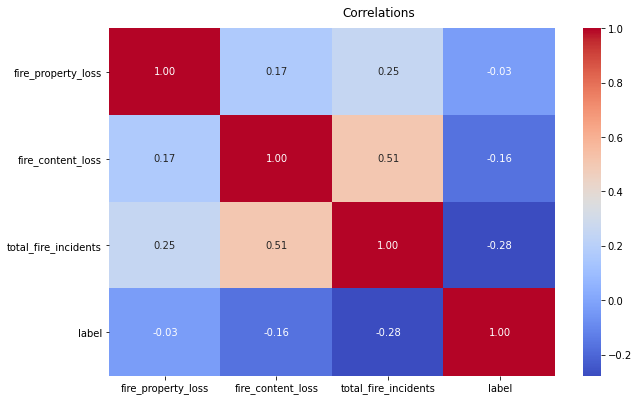

In [218]:
f, ax = plt.subplots(figsize=(10, 6))
heatmap = sns.heatmap(corr_fire,
                      ax=ax,
                      cmap="coolwarm",
                      fmt=".2f",
                      annot=True)
f.subplots_adjust(top=0.93)
t = f.suptitle("Correlations")
# https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

**Correlation on Zipcode As Labels**

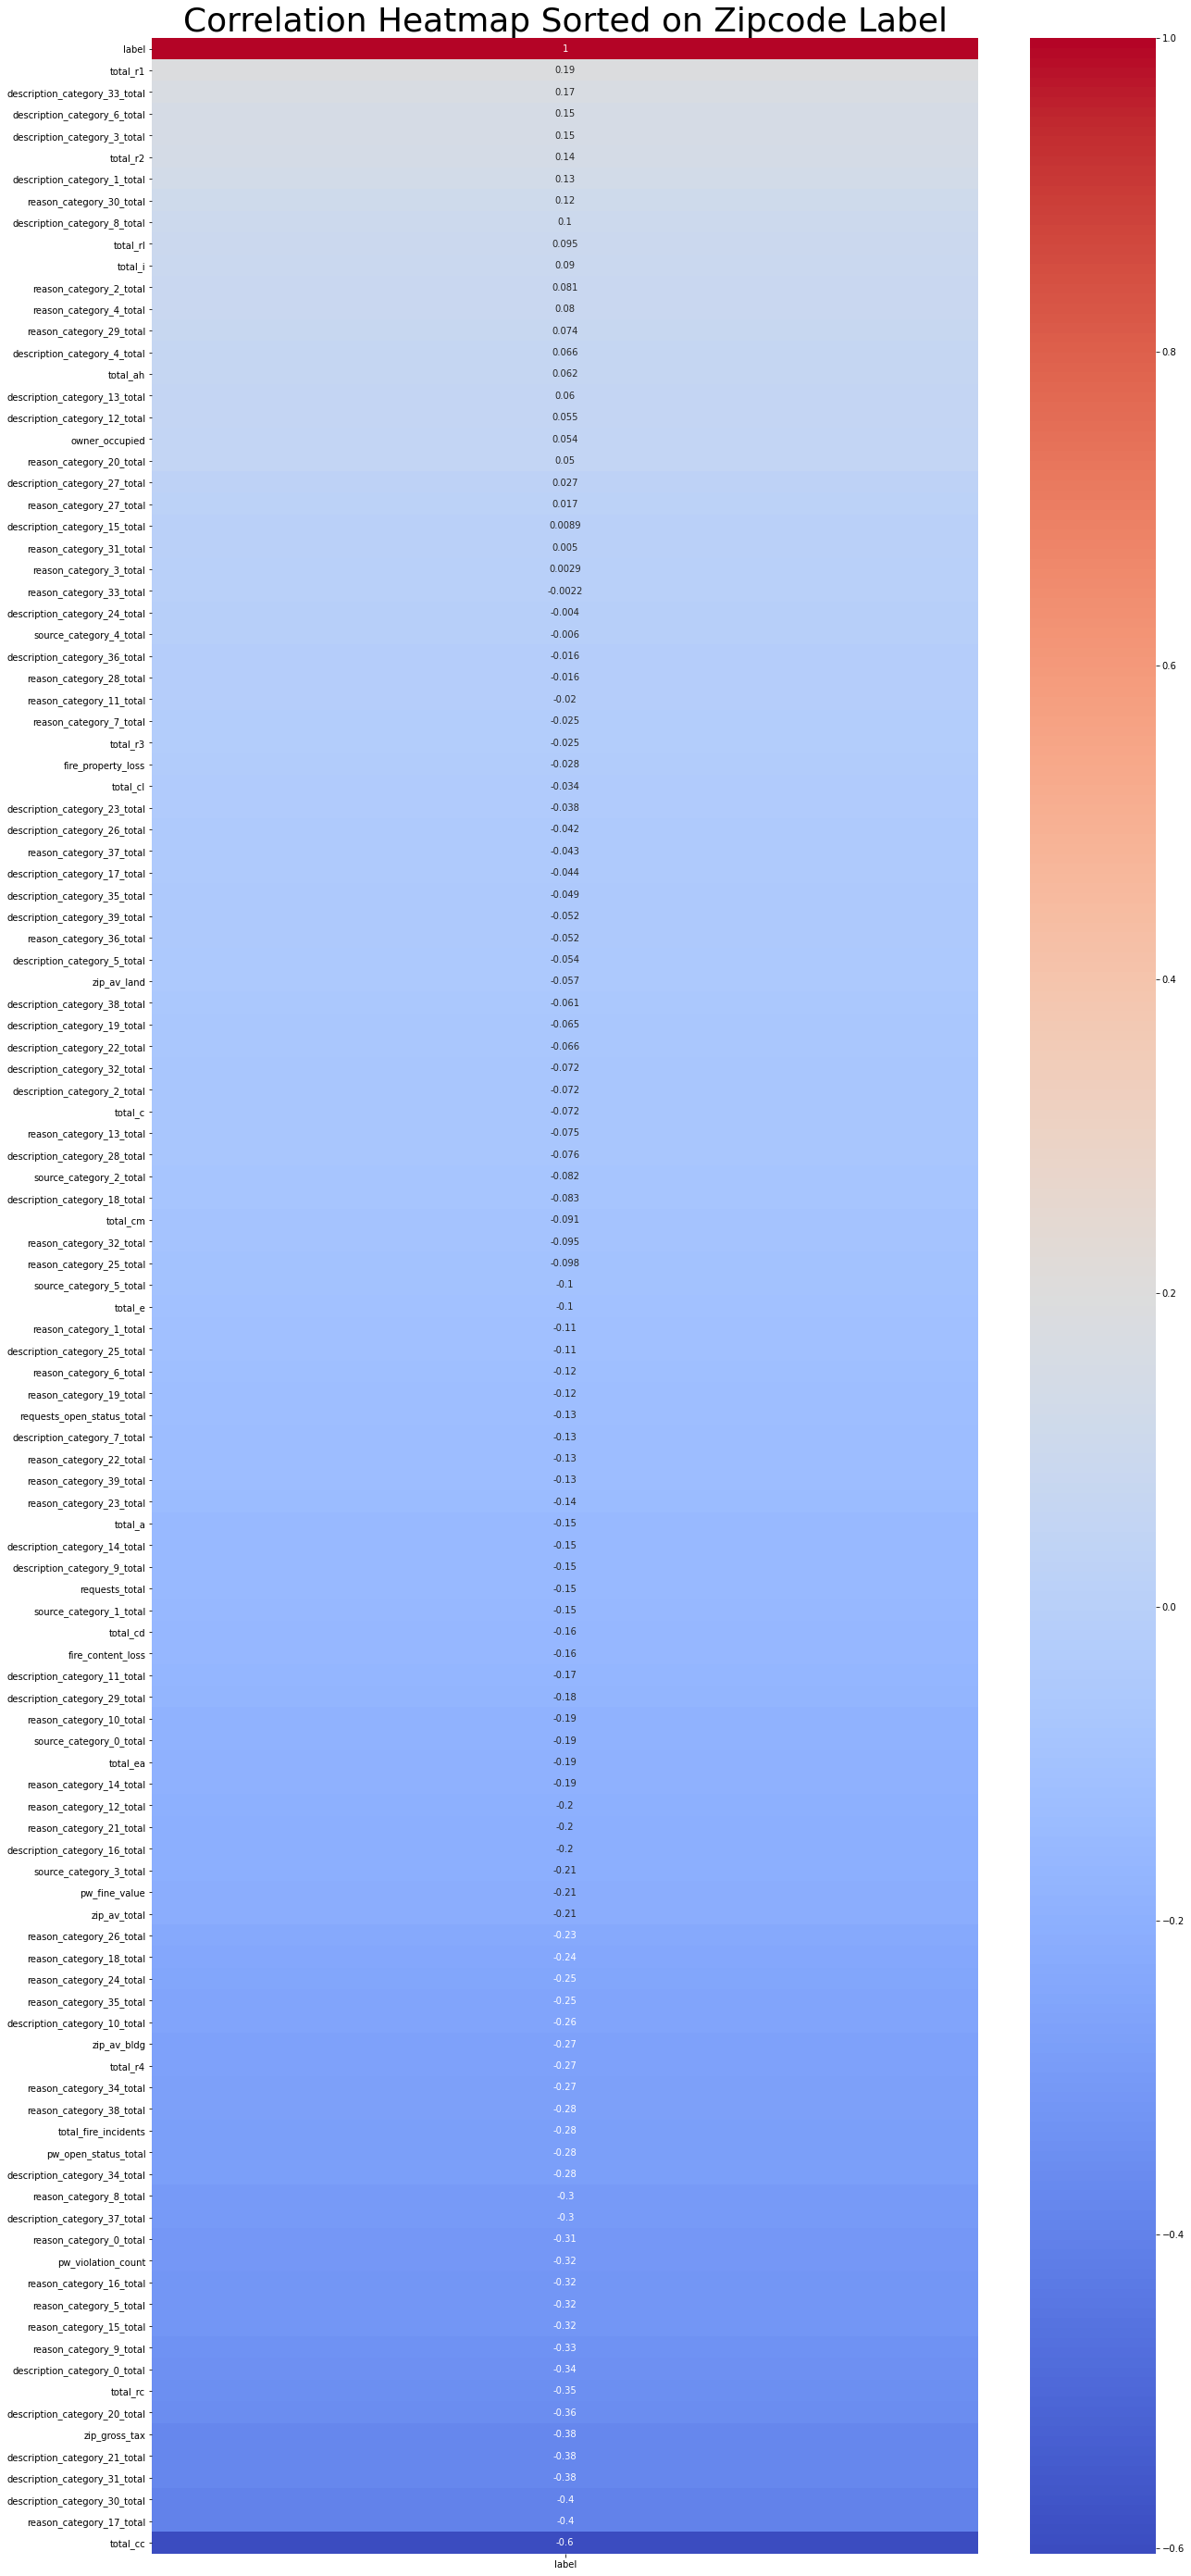

In [220]:
plt.figure(figsize=(20, 50))

plt.title("Correlation Heatmap Sorted on Zipcode Label", fontsize=36)
sns.heatmap(corr_main.drop("zipcode")[
           ["label"]].sort_values(by=["label"], ascending=False),
           cmap="coolwarm",
           annot=True);

# Histograms

**For organization of the outputs from the `.hist()` method, the histograms will be grouped together based on  the dataset they oirginated from.**

In [206]:
# for col_list in all_cols:
#     print(col_list)
#     main[col_list].hist()
#     print()

In [207]:
# DATA
main[data_cols].hist(
    figsize=(20, 40),
    layout=(7, 3)
);

Error in callback <function flush_figures at 0x7f204cc0d4d0> (for post_execute):


KeyboardInterrupt: 

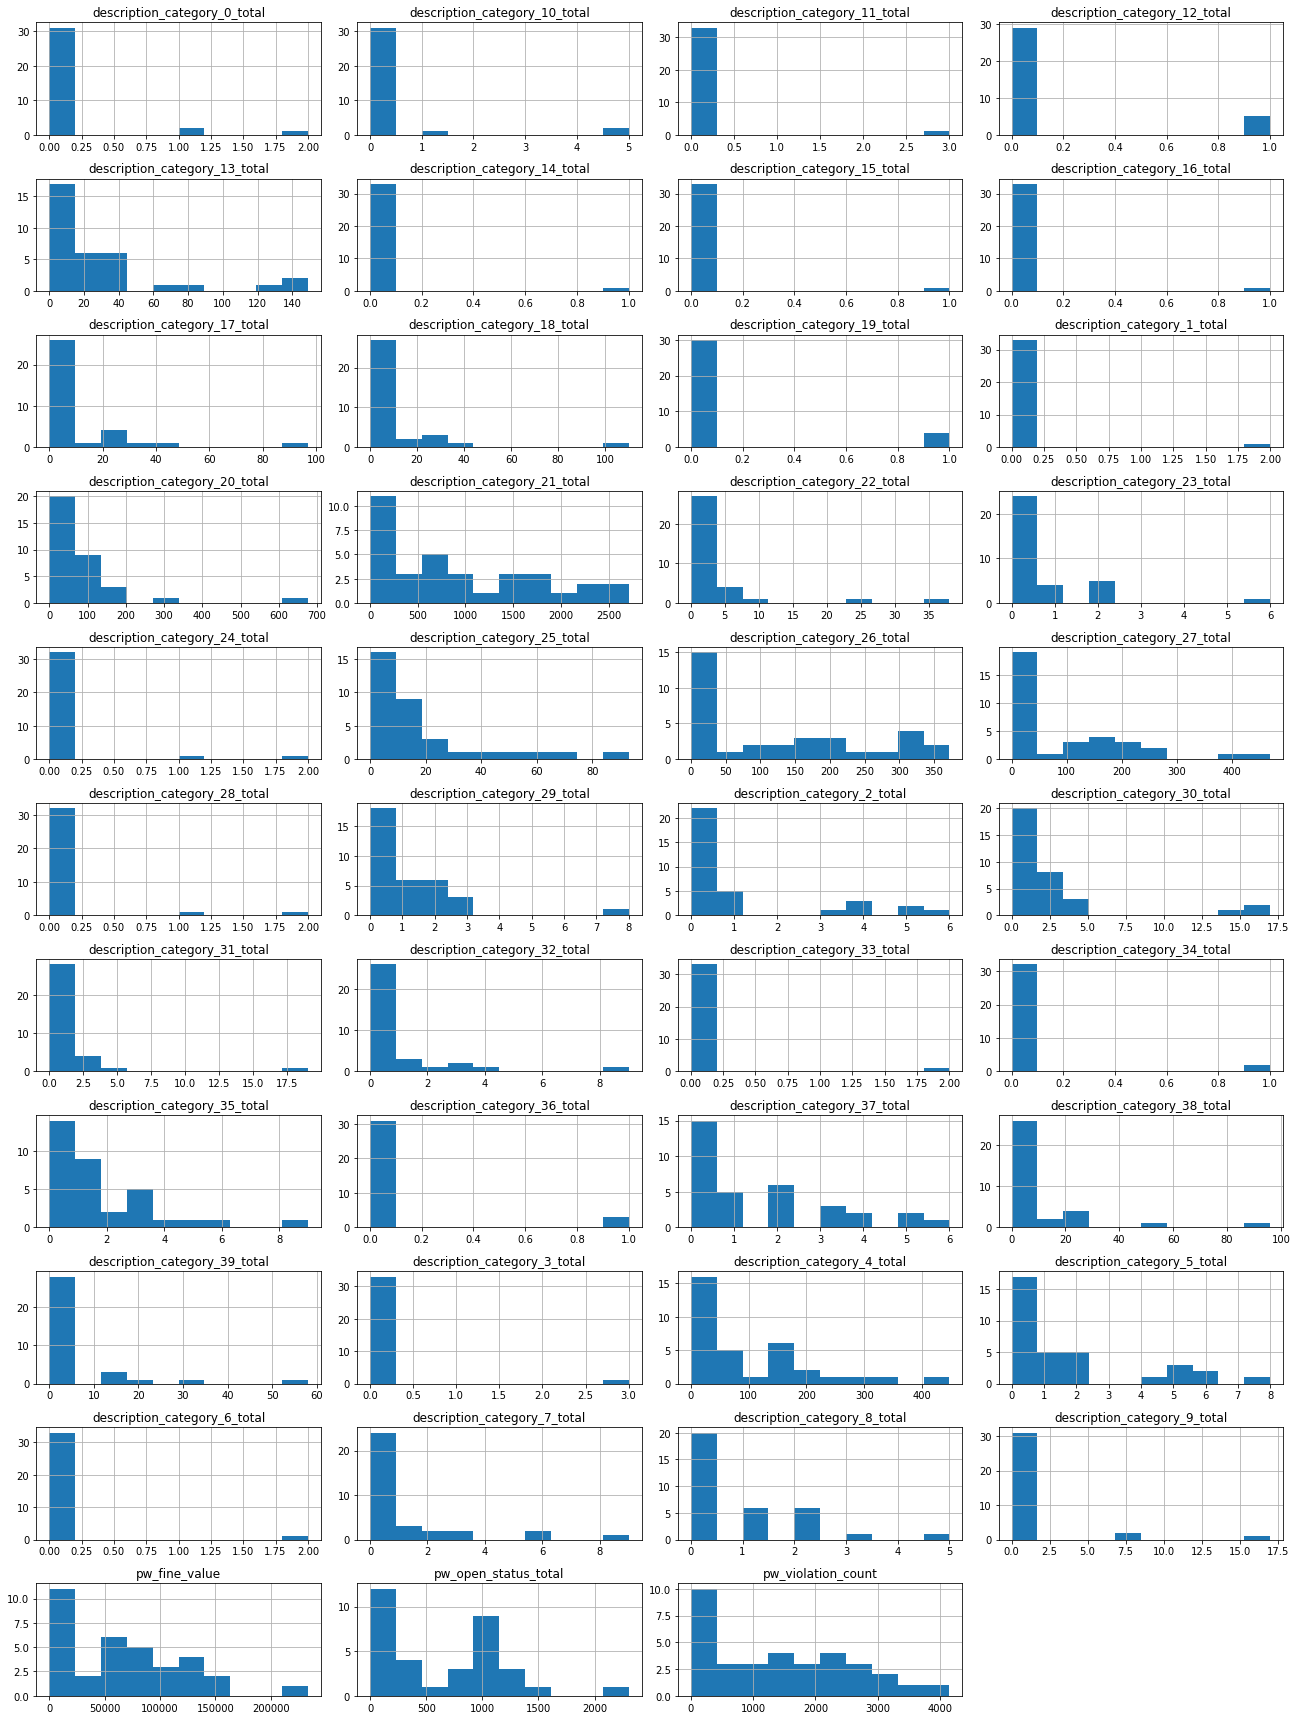

In [208]:
# PW VIOLATIONS
main[pw_cols].hist(
    figsize=(18, 24),
    layout=(11, 4)
)
plt.tight_layout();

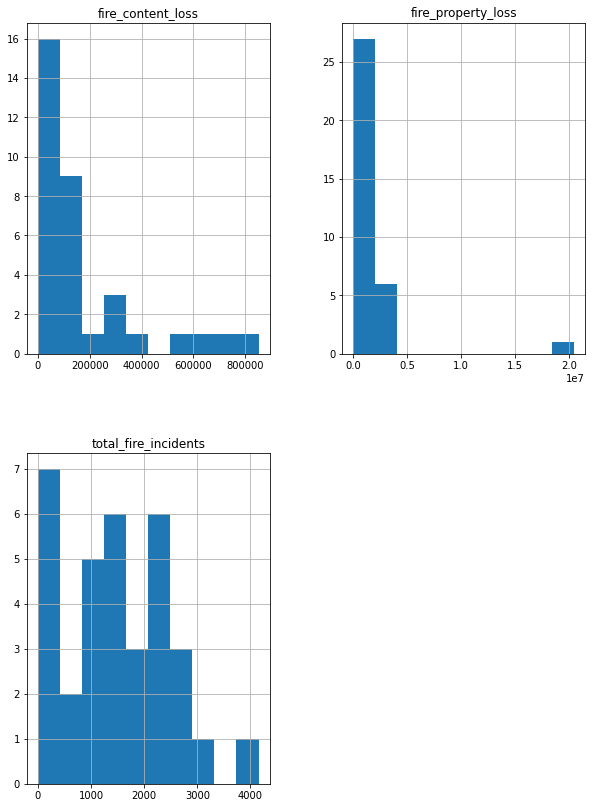

In [209]:
# FIRE 
main[fire_cols].hist(
    figsize=(10, 14)
);

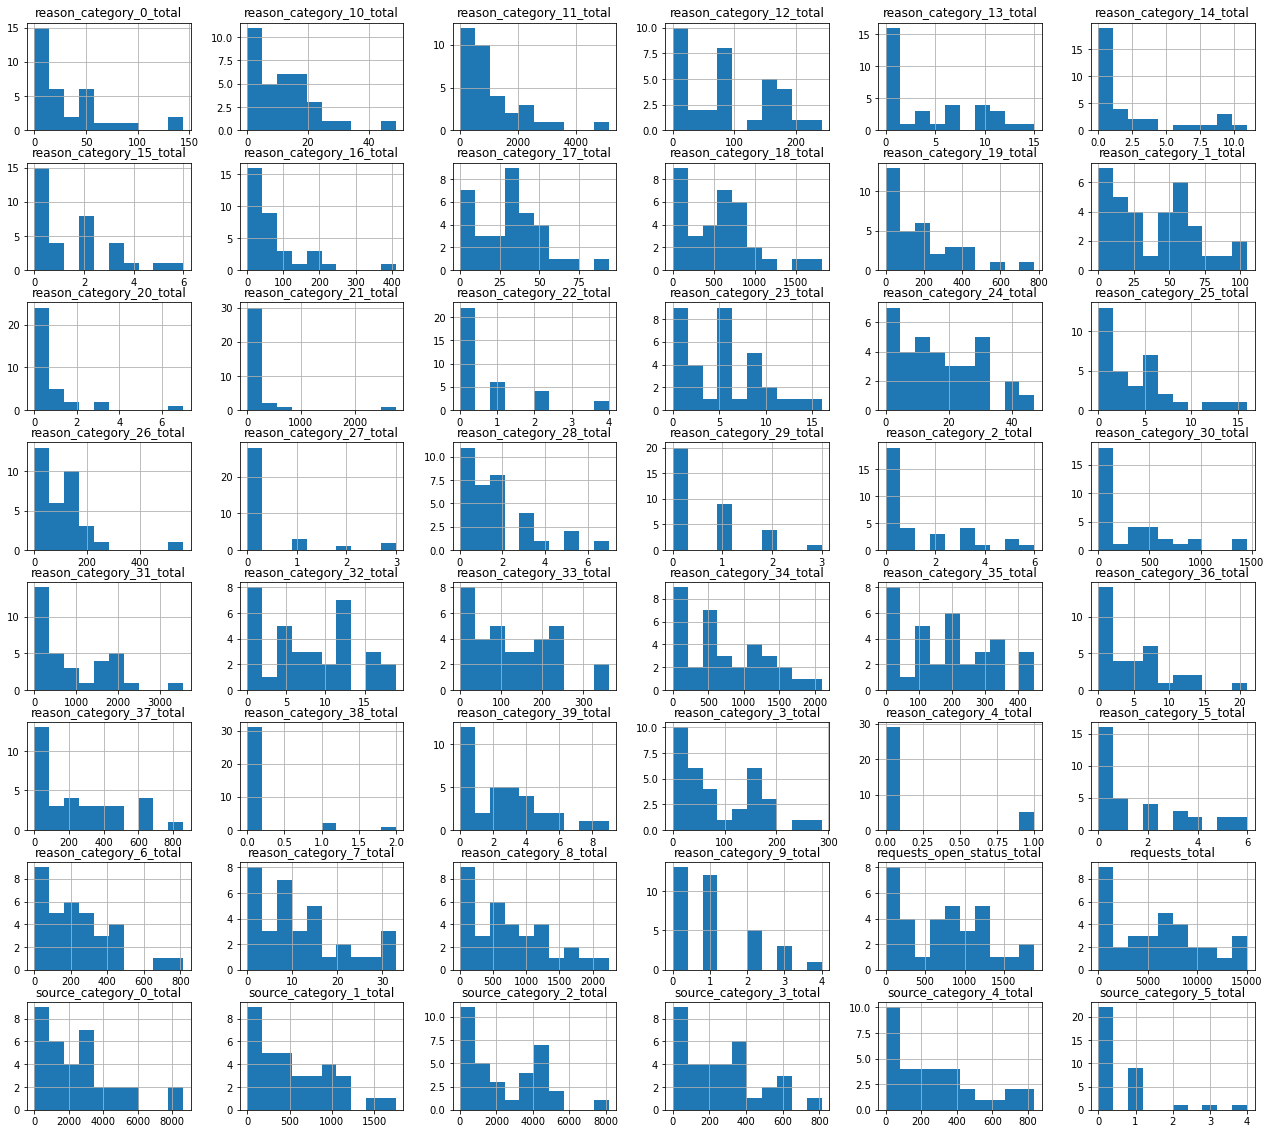

In [210]:
# REQUESTS
main[requests_cols].hist(
    figsize=(22, 20),
    layout=(8, 6)
);

# Boxplots

# Plots

## Data Plots

/home/patrick/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 1440x7200 with 0 Axes>

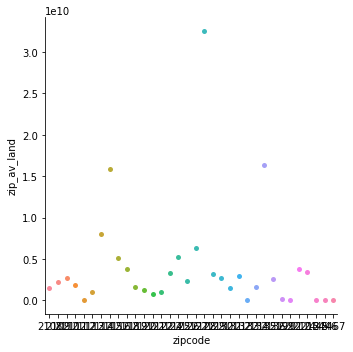

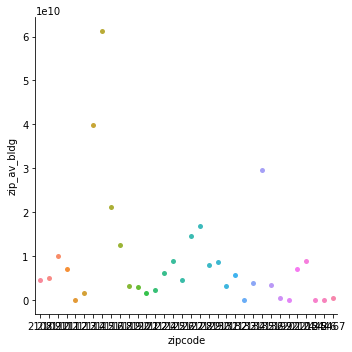

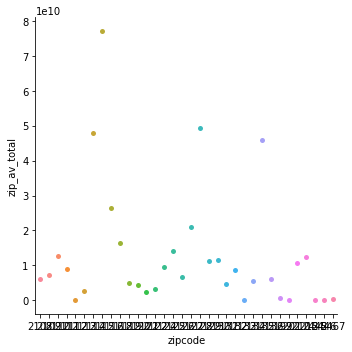

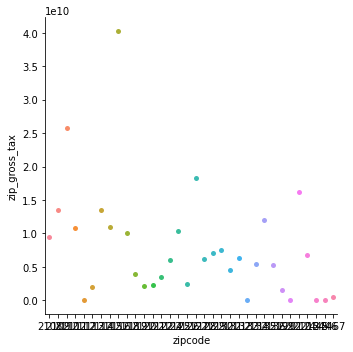

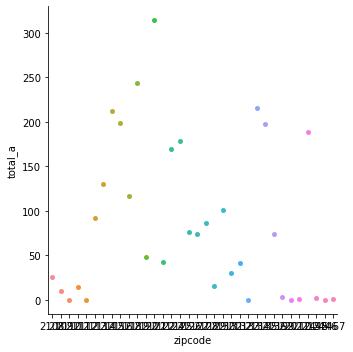

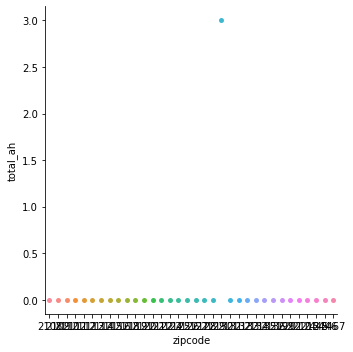

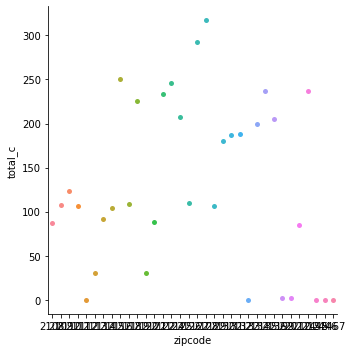

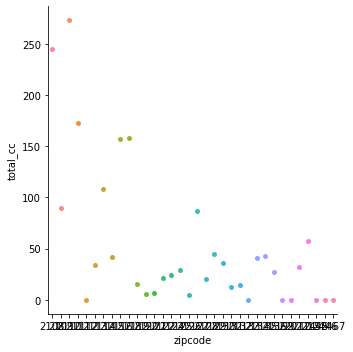

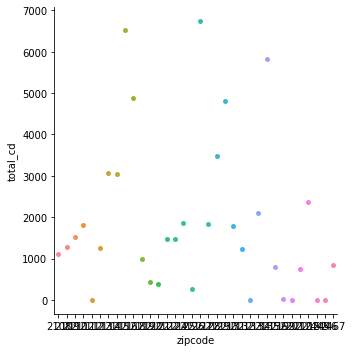

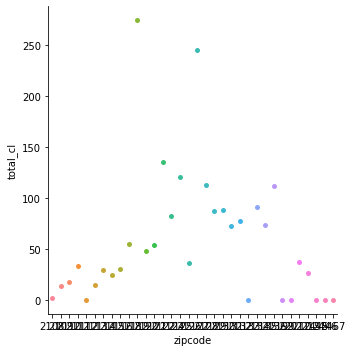

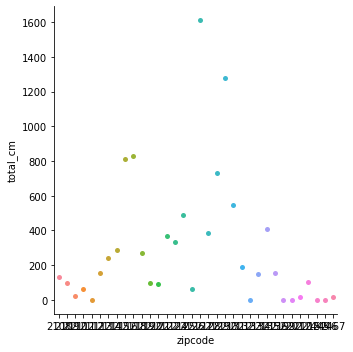

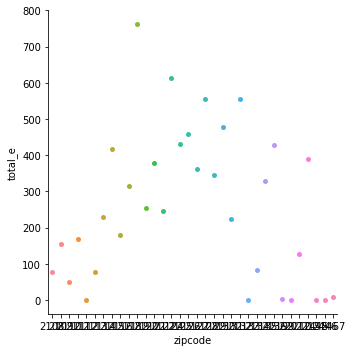

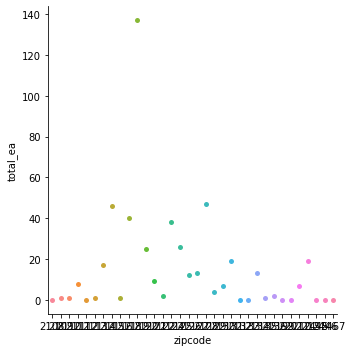

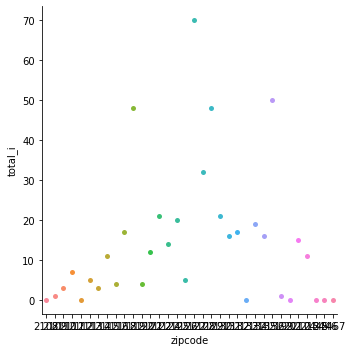

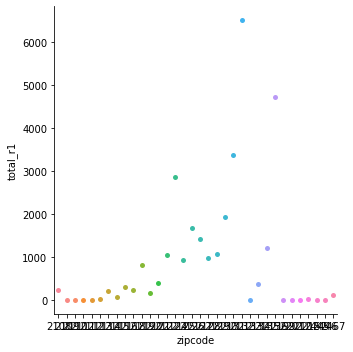

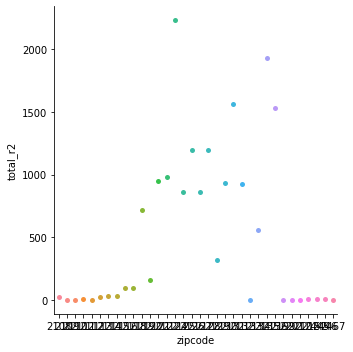

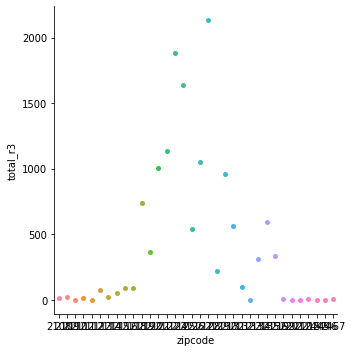

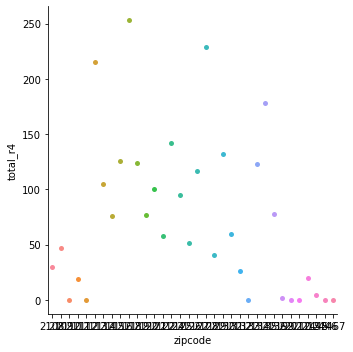

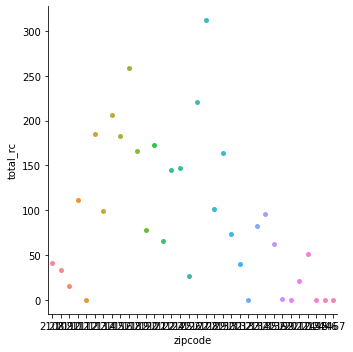

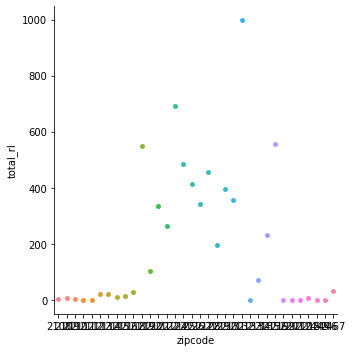

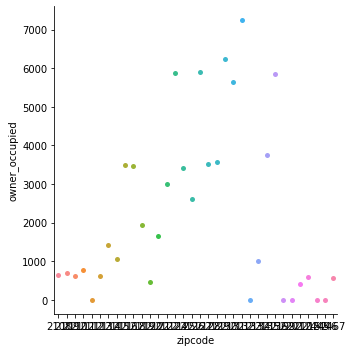

In [211]:
plt.figure(figsize=(20, 100))
for col in data_cols:
    sns.catplot(x="zipcode",
                y=col,
                kind="swarm",
                data=main)

## Fire Plots

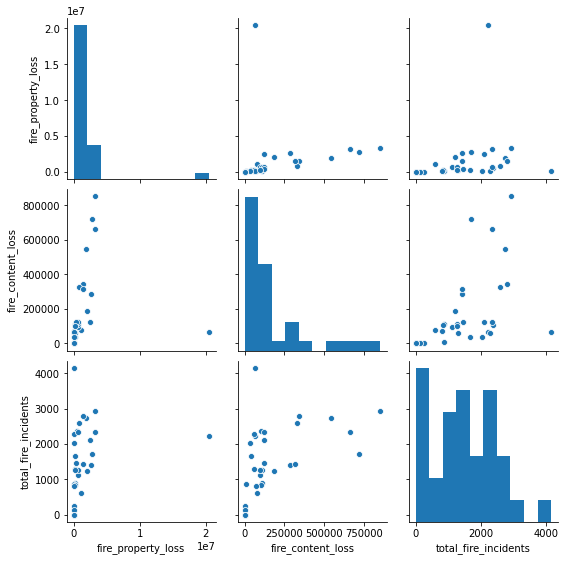

In [212]:
# ON FIRE COLUMNS

sns.pairplot(main[fire_cols]);

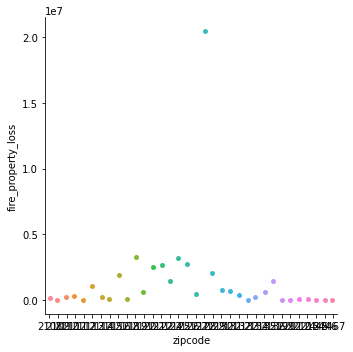

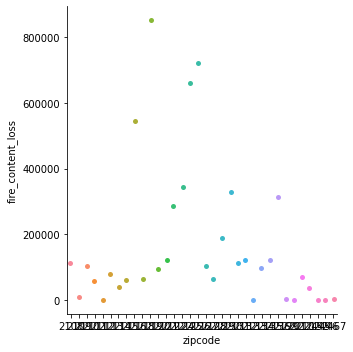

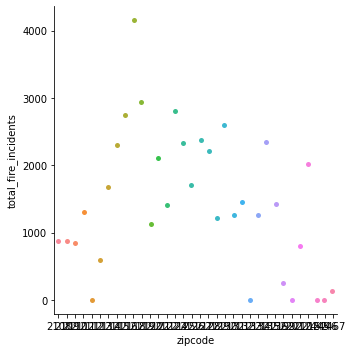

In [213]:
for col in fire_cols:
    sns.catplot(x="zipcode",
                y=col,
                data=main)